In [1]:
import pandas as pd
import numpy as np
import pickle
import random
from matplotlib import pyplot as plt
from MonotonicCheck import monotonicity_score, check_monotonicity
from LimitsCheck import check_limit, highest_and_lowest_indexes
from CalibrationCheck import calibration_check

In [2]:
with open('models/XGBoost/XGBoost.pkl', 'rb') as f:
    XGBoost = pickle.load(f)
with open('models/LogisticRegression/LogisticRegression.pkl', 'rb') as f:
    LR = pickle.load(f)
with open('models/RandomForest/RandomForest.pkl', 'rb') as f:
    RF = pickle.load(f)
models = [XGBoost, LR, RF]


In [3]:
df = pd.read_csv('../datasets/fraud_new.csv')
example = df.sample(1)
example = example.drop('isFraud', axis = 1)

Highest positives identified on feature step: 
	From values 38.475 to 45.97 : diff = 0.00015616416931152344
	From values 8.495 to 15.99 : diff = 0.00011211633682250977
	From values 225.848 to 233.343 : diff = 6.276369094848633e-05
Lowest negatives identified on feature step: 
	From values 15.99 to 23.485 : diff = 0.0
	From values 180.879 to 188.374 : diff = 0.0
	From values 203.364 to 210.859 : diff = 0.0


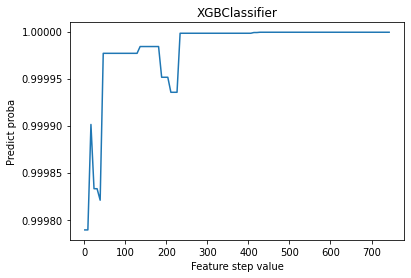

Highest positives identified on feature step: 
	From values 1.0 to 8.495 : diff = 8.753620583945576e-08
	From values 8.495 to 15.99 : diff = 8.01161644803372e-08
	From values 15.99 to 23.485 : diff = 7.332508478175015e-08


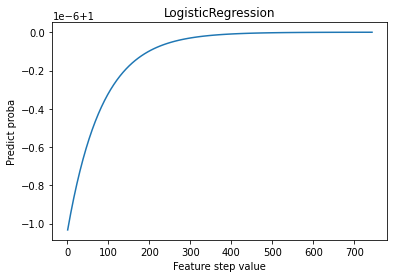

Lowest negatives identified on feature step: 
	From values 713.02 to 720.515 : diff = -0.30900000000000005
	From values 405.727 to 413.222 : diff = -0.0010000000000000009


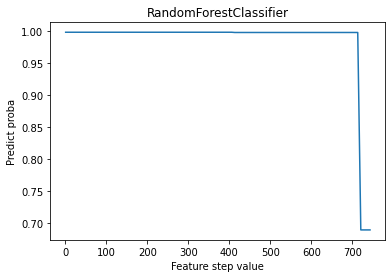

Lowest negatives identified on feature type: 
	From values 0.495 to 0.505 : diff = 0.0


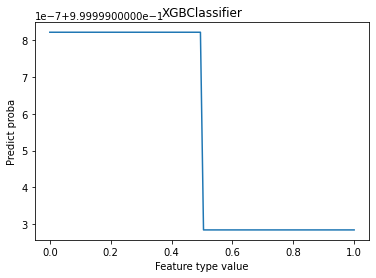

Highest positives identified on feature type: 
	From values 0.01 to 0.02 : diff = 1.1102230246251565e-16
	From values 0.01 to 0.02 : diff = 1.1102230246251565e-16
	From values 0.01 to 0.02 : diff = 1.1102230246251565e-16


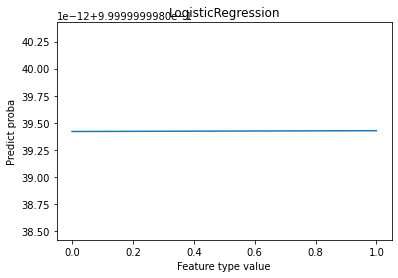

Lowest negatives identified on feature type: 
	From values 0.495 to 0.505 : diff = 0.0


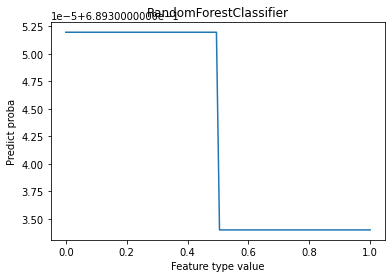

Highest positives identified on feature amount: 
	From values 0.0 to 933793.097 : diff = 0.7565971612930298
	Warning, prediction has changed
	From values 2801379.292 to 3735172.389 : diff = 1.5497207641601562e-06
Lowest negatives identified on feature amount: 
	From values 1867586.195 to 2801379.292 : diff = 0.0
	From values 933793.097 to 1867586.195 : diff = 0.0


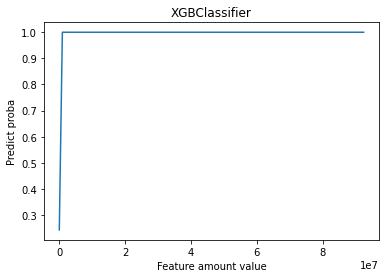

Highest positives identified on feature amount: 
	From values 0.0 to 933793.097 : diff = 1.1345635542170385e-09
	From values 933793.097 to 1867586.195 : diff = 4.218847493575595e-15


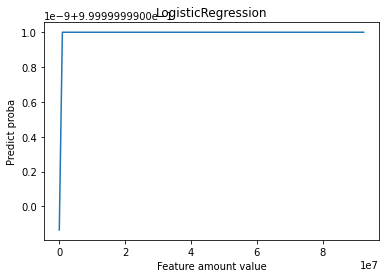

Highest positives identified on feature amount: 
	From values 0.0 to 933793.097 : diff = 0.02994084620786952
Lowest negatives identified on feature amount: 
	From values 1867586.195 to 2801379.292 : diff = 0.0
	From values 2801379.292 to 3735172.389 : diff = 0.0


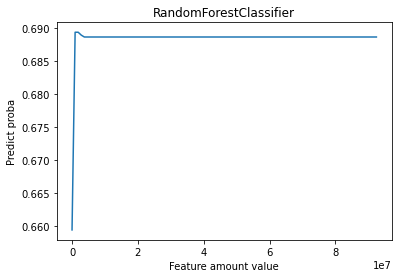

Lowest negatives identified on feature oldBalanceOrig: 
	From values 2407476.379 to 3009345.473 : diff = 0.0
	From values 0.0 to 601869.095 : diff = 0.0
	From values 601869.095 to 1203738.189 : diff = 0.0


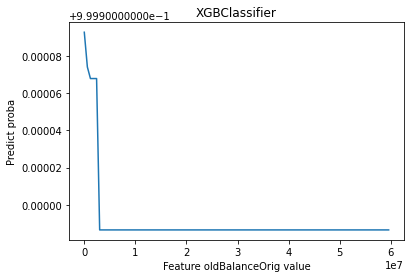

Lowest negatives identified on feature oldBalanceOrig: 
	From values 51158873.045 to 51760742.14 : diff = -0.765
	From values 50557003.95 to 51158873.045 : diff = -0.235
	From values 51760742.14 to 52362611.234 : diff = 0.0


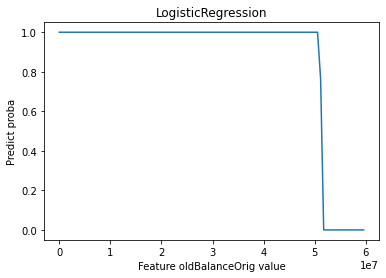

Lowest negatives identified on feature oldBalanceOrig: 
	From values 601869.095 to 1203738.189 : diff = -0.122
	From values 1203738.189 to 1805607.284 : diff = -0.08799999999999997
	From values 1805607.284 to 2407476.379 : diff = -0.009999999999999953


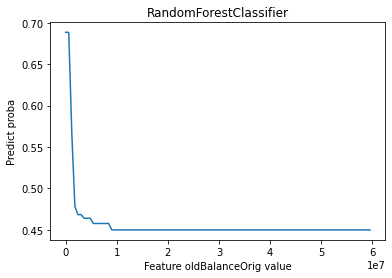

Highest positives identified on feature newBalanceOrig: 
	From values 1001717.987 to 1502576.981 : diff = 1.800060272216797e-05
Lowest negatives identified on feature newBalanceOrig: 
	From values 0.0 to 500858.994 : diff = -0.0009999871253967285


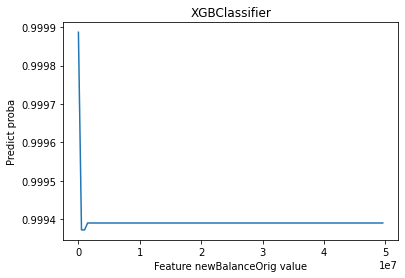

Highest positives identified on feature newBalanceOrig: 
	From values 6511166.917 to 7012025.911 : diff = 0.6793404931757855
	Warning, prediction has changed
	From values 6010307.924 to 6511166.917 : diff = 0.32065914300228304
	From values 7012025.911 to 7512884.905 : diff = 2.975321753417859e-07


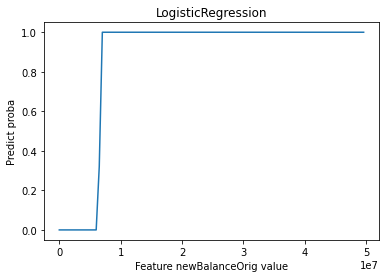

Highest positives identified on feature newBalanceOrig: 
	From values 0.0 to 500858.994 : diff = 0.08229015321516692
	Warning, prediction has changed
Lowest negatives identified on feature newBalanceOrig: 
	From values 4507730.943 to 5008589.936 : diff = -0.0040000000000000036


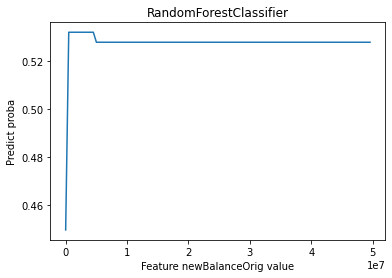

Highest positives identified on feature oldBalanceDest: 
	From values 0.0 to 3596120.094 : diff = 0.0009212493896484375


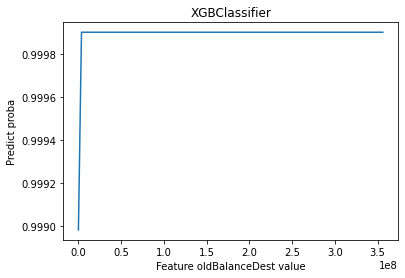

Lowest negatives identified on feature oldBalanceDest: 
	From values 251728406.611 to 255324526.706 : diff = -0.989
	From values 248132286.517 to 251728406.611 : diff = -0.01100000000000001
	From values 255324526.706 to 258920646.8 : diff = 0.0


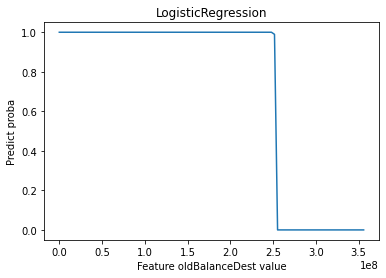

Highest positives identified on feature oldBalanceDest: 
	From values 0.0 to 3596120.094 : diff = 0.001753120863661528


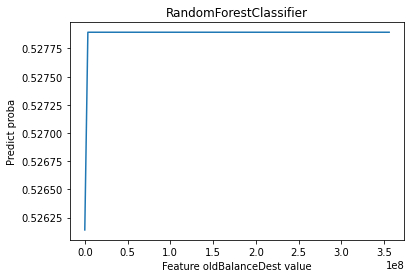

Highest positives identified on feature newBalanceDest: 
	From values 0.0 to 3597770.494 : diff = 0.0032016634941101074
Lowest negatives identified on feature newBalanceDest: 
	From values 3597770.494 to 7195540.988 : diff = 0.0


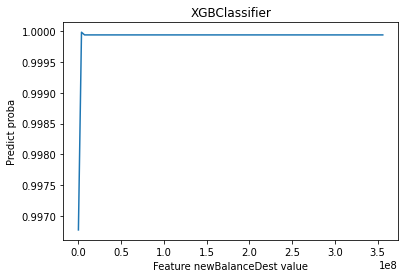

Highest positives identified on feature newBalanceDest: 
	From values 75553180.377 to 79150950.871 : diff = 0.532477500960289
	Warning, prediction has changed
	From values 71955409.883 to 75553180.377 : diff = 0.46752249903421483
	From values 79150950.871 to 82748721.365 : diff = 3.103628465339625e-12


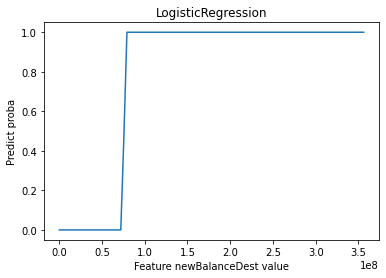

Highest positives identified on feature newBalanceDest: 
	From values 0.0 to 3597770.494 : diff = 0.04453914673449311
	Warning, prediction has changed


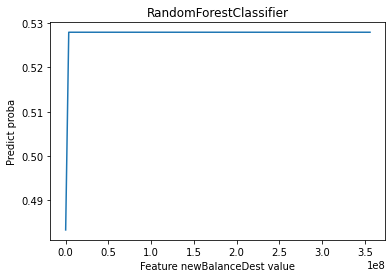

Highest positives identified on feature errorBalanceOrig: 
	From values -0.01 to 933793.087 : diff = 0.657850444316864
	Warning, prediction has changed
	From values 1867586.185 to 2801379.282 : diff = 0.00022417306900024414
Lowest negatives identified on feature errorBalanceOrig: 
	From values 933793.087 to 1867586.185 : diff = 0.0


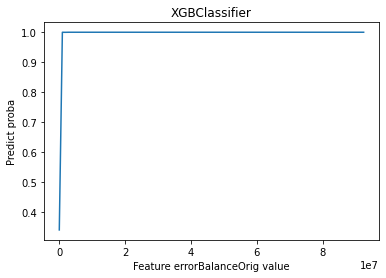

Highest positives identified on feature errorBalanceOrig: 
	From values -0.01 to 933793.087 : diff = 0.01871393623611739
Lowest negatives identified on feature errorBalanceOrig: 
	From values 2801379.282 to 3735172.38 : diff = 0.0


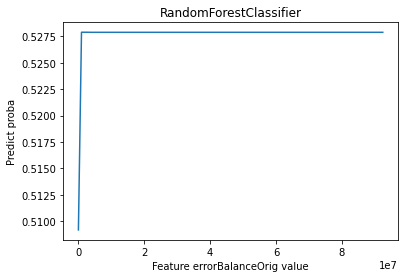

Lowest negatives identified on feature errorBalanceDest: 
	From values -410390.985 to 457141.597 : diff = -0.5160000324249268
	From values -1277923.568 to -410390.985 : diff = 0.0


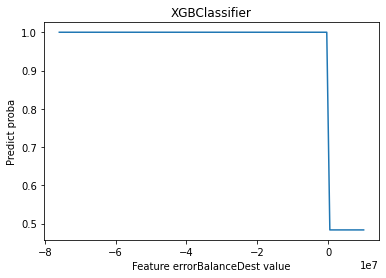

Lowest negatives identified on feature errorBalanceDest: 
	From values 457141.597 to 1324674.179 : diff = -0.07500000000000001
	From values 8264934.836 to 9132467.418 : diff = -0.020000000000000018
	From values 4794804.507 to 5662337.089 : diff = -0.015000000000000013


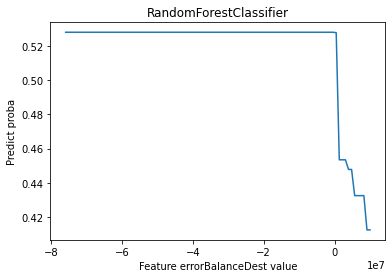

In [4]:
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            check_limit(model, example, c, minV, maxV, )

Model: XGBClassifier
Feature 'step' has a score of 0.2857142857142857


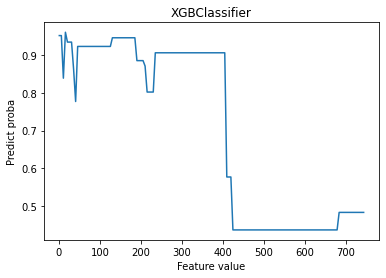

Model: LogisticRegression
Feature step has monotonic behavior between ranges 1 and 743


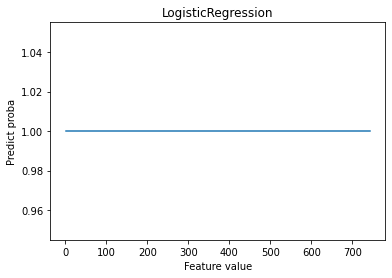

Model: RandomForestClassifier
Feature step has monotonic behavior between ranges 1 and 743


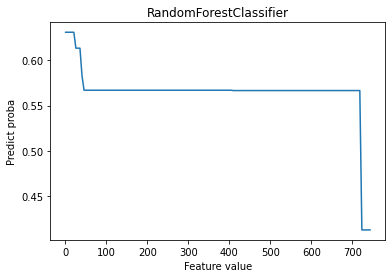

Model: XGBClassifier
Feature type has monotonic behavior between ranges 0 and 1


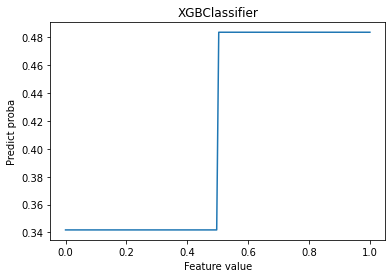

Model: LogisticRegression
Feature type has monotonic behavior between ranges 0 and 1


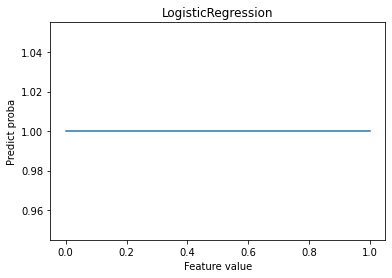

Model: RandomForestClassifier
Feature type has monotonic behavior between ranges 0 and 1


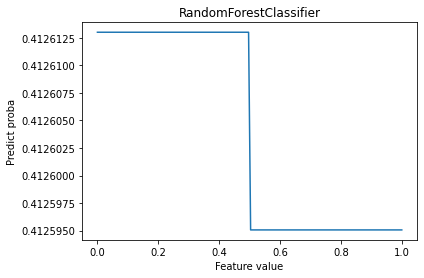

Model: XGBClassifier
Feature 'amount' has a score of 0.6


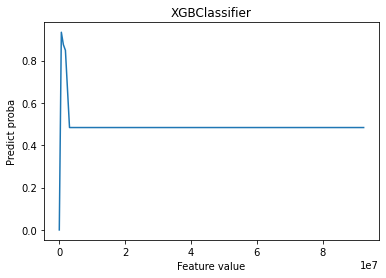

Model: LogisticRegression
Feature amount has monotonic behavior between ranges 0.0 and 92445516.64


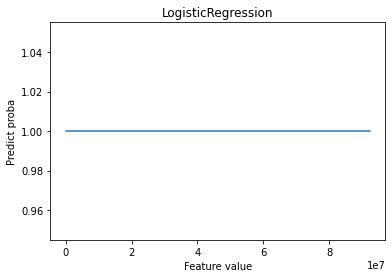

Model: RandomForestClassifier
Feature 'amount' has a score of 0.3333333333333333


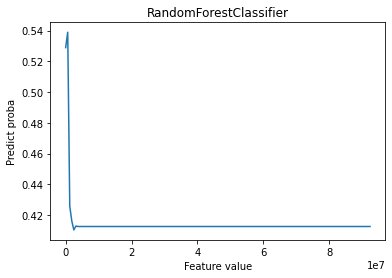

Model: XGBClassifier
Feature oldBalanceOrig has monotonic behavior between ranges 0.0 and 59585040.37


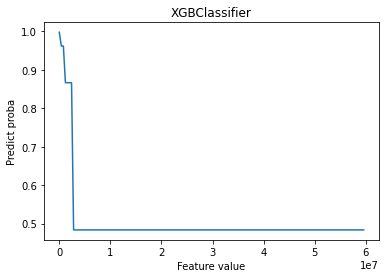

Model: LogisticRegression
Feature oldBalanceOrig has monotonic behavior between ranges 0.0 and 59585040.37


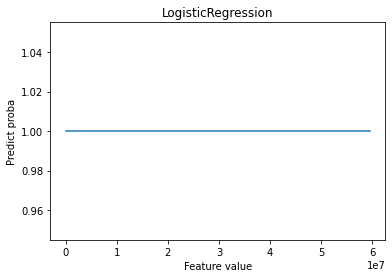

Model: RandomForestClassifier
Feature oldBalanceOrig has monotonic behavior between ranges 0.0 and 59585040.37


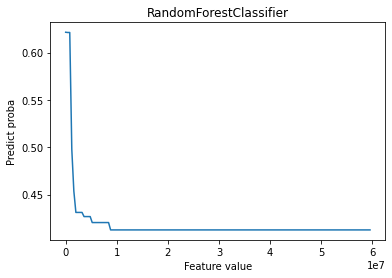

Model: XGBClassifier
Feature newBalanceOrig has monotonic behavior between ranges 0.0 and 49585040.37


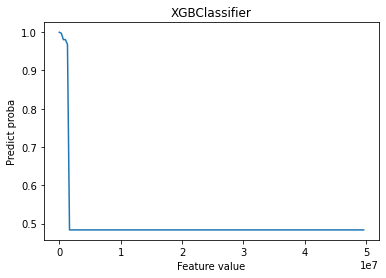

Model: LogisticRegression
Feature newBalanceOrig has monotonic behavior between ranges 0.0 and 49585040.37


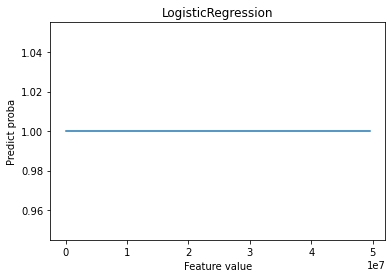

Model: RandomForestClassifier
Feature 'newBalanceOrig' has a score of 0.3333333333333333


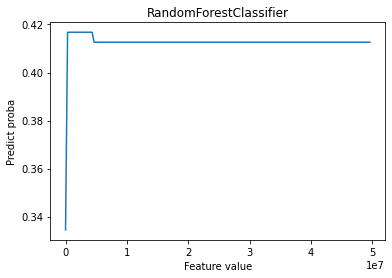

Model: XGBClassifier
Feature oldBalanceDest has monotonic behavior between ranges 0.0 and 356015889.35


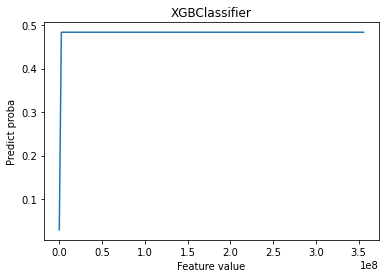

Model: LogisticRegression
Feature oldBalanceDest has monotonic behavior between ranges 0.0 and 356015889.35


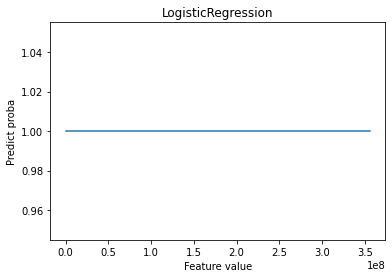

Model: RandomForestClassifier
Feature oldBalanceDest has monotonic behavior between ranges 0.0 and 356015889.35


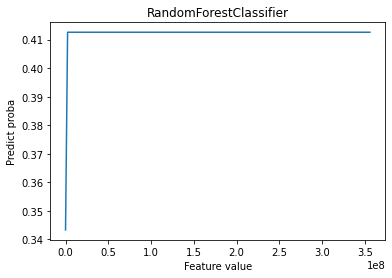

Model: XGBClassifier
Feature 'newBalanceDest' has a score of 0.3333333333333333


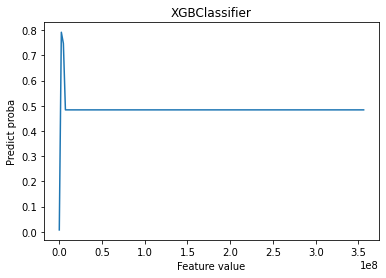

Model: LogisticRegression
Feature newBalanceDest has monotonic behavior between ranges 0.0 and 356179278.92


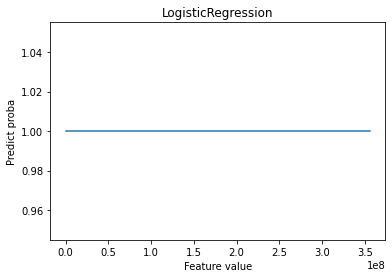

Model: RandomForestClassifier
Feature newBalanceDest has monotonic behavior between ranges 0.0 and 356179278.92


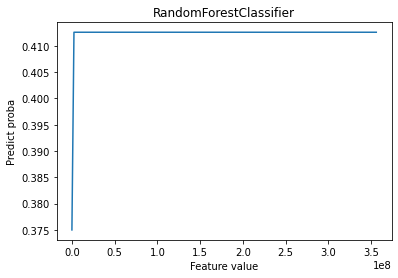

Model: XGBClassifier
Feature 'errorBalanceOrig' has a score of 0.3333333333333333


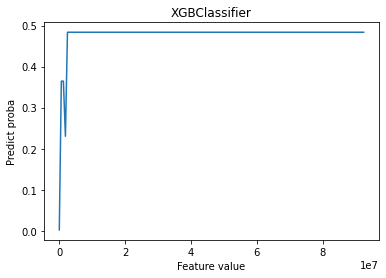

Model: LogisticRegression
Feature errorBalanceOrig has monotonic behavior between ranges -0.0100000016391277 and 92445516.64


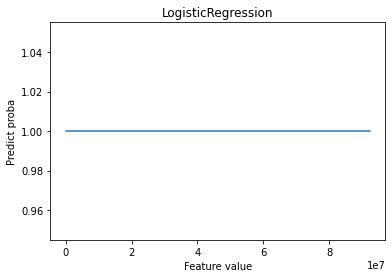

Model: RandomForestClassifier
Feature errorBalanceOrig has monotonic behavior between ranges -0.0100000016391277 and 92445516.64


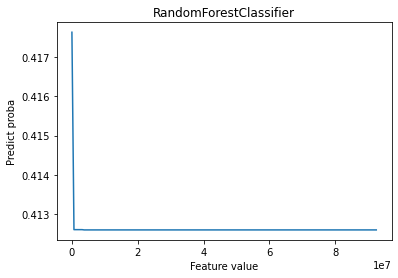

Model: XGBClassifier
Feature errorBalanceDest has monotonic behavior between ranges -75885725.63000001 and 10000000.0


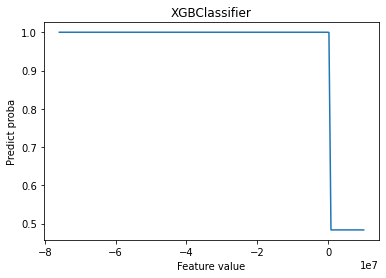

Model: LogisticRegression
Feature errorBalanceDest has monotonic behavior between ranges -75885725.63000001 and 10000000.0


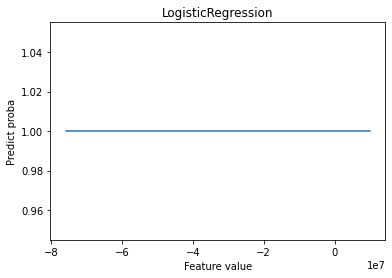

Model: RandomForestClassifier
Feature errorBalanceDest has monotonic behavior between ranges -75885725.63000001 and 10000000.0


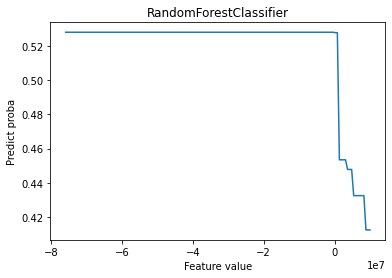

In [5]:
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            check_monotonicity(c,minV,maxV,example, model, 150, plot_graph=True)

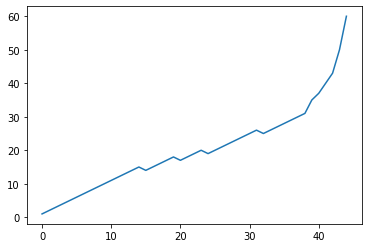

0.8181818181818182


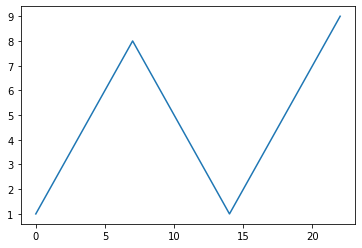

0.36363636363636365


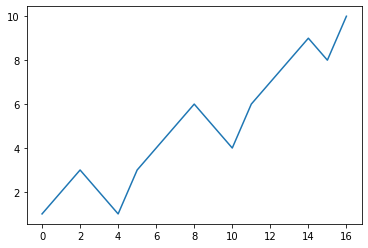

0.375


In [6]:
import math
v3= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,14,15,16,17,18,17,18,19,20,19,20,21,22,23,24,25,26,25,26,27,28,29,30,31,35,37,40,43,50,60]
plt.plot([x for x in range(len(v3))], v3)
plt.show()
print(monotonicity_score(v3))
v = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1,2,3,4,5,6,7,8,9] 
plt.plot([x for x in range(len(v))], v)
plt.show()
print(monotonicity_score(v))
v2= [1,2,3,2,1,3,4,5,6,5,4,6,7,8,9,8,10]
plt.plot([x for x in range(len(v2))], v2)
plt.show()
print(monotonicity_score(v2))


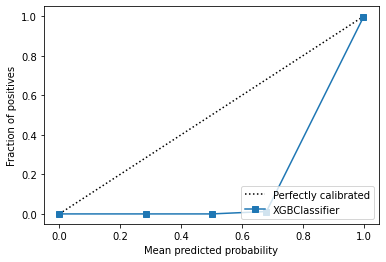

Brier Score Loss: 3.798964224303799e-05 for model XGBClassifier


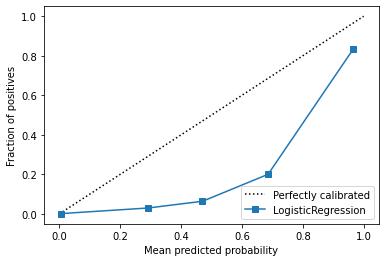

Brier Score Loss: 0.003402447847732624 for model LogisticRegression


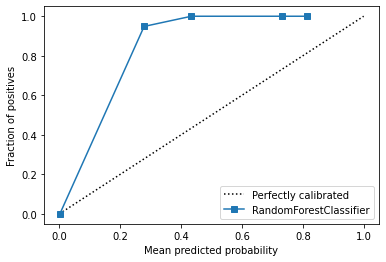

Brier Score Loss: 0.0017698572499968831 for model RandomForestClassifier


In [7]:
for model in models:
    calibration_check("isFraud", model, df, True)